Segmented image saved as segmented_output.pgm


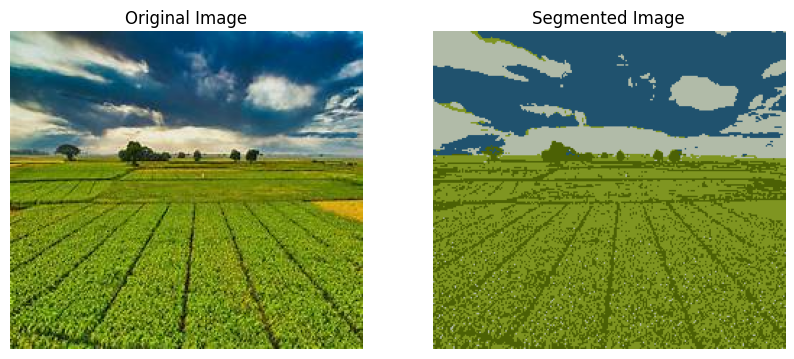

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image(image_path, k=3):

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read the image. Check the file path.")
        return

    # Convert image to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape image into a 2D array of pixels
    pixel_values = image_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Apply K-Means Clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 and reshape segmented image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Convert segmented image to grayscale
    gray_segmented = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

    # Save the segmented image as a PGM file
    pgm_path = "segmented_output.pgm"
    cv2.imwrite(pgm_path, gray_segmented)
    print(f"Segmented image saved as {pgm_path}")

    # Display the segmented output
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Segmented Image")
    plt.axis("off")

    plt.show()

# Run the segmentation on your image
segment_image('/content/th (1).jpeg', k=4)